In [81]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, Birch, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from itertools import product
import matplotlib.pyplot as plt
import math

In [ ]:
df = pd.read_csv("ENB2012_data.csv")
df

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe().T

In [ ]:
X = df.iloc[:, 0:8]
X

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [51]:
results = []

In [ ]:
# --- K-Means ---
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    results.append(("K-Means", {"k": k}, score))

In [73]:
# --- DBSCAN ---
for eps, minpts in product(np.arange(0.3, 1.6, 0.1), range(3, 6)):
    model = DBSCAN(eps=eps, min_samples=minpts)
    labels = model.fit_predict(X_pca)
    if len(set(labels)) > 1 and -1 not in set(labels):
        score = silhouette_score(X_pca, labels)
        results.append(("DBSCAN", {"eps": eps, "minPts": minpts}, score))

In [74]:
# --- Hierarchical ---
for k in range(2, 11):
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    results.append(("Hierarchical", {"k": k}, score))

In [ ]:
# --- Gaussian Mixture ---
for k in range(2, 11):
    model = GaussianMixture(n_components=k, random_state=42)
    labels = model.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    results.append(("GMM", {"n_components": k}, score))

In [76]:
# --- Mean Shift ---
for bw in [0.5, 1.0, 1.5, 2.0]:
    model = MeanShift(bandwidth=bw)
    labels = model.fit_predict(X_pca)
    if len(set(labels)) > 1:
        score = silhouette_score(X_pca, labels)
        results.append(("Mean Shift", {"bandwidth": bw}, score))

In [ ]:
# --- Birch ---
for k in range(2, 11):
    model = Birch(n_clusters=k)
    labels = model.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    results.append(("Birch", {"n_clusters": k}, score))

In [ ]:
# --- Spectral Clustering ---
for k in range(2, 11):
    model = SpectralClustering(n_clusters=k, assign_labels="kmeans", random_state=42)
    labels = model.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    results.append(("Spectral Clustering", {"n_clusters": k}, score))

In [156]:
results_df = pd.DataFrame(results, columns=["Algorithm", "Parameters", "Silhouette Score"])
best_per_algo = results_df.loc[results_df.groupby("Algorithm")["Silhouette Score"].idxmax()].reset_index(drop=True)
print(best_per_algo)

             Algorithm                 Parameters  Silhouette Score
0                Birch          {'n_clusters': 8}          0.728984
1               DBSCAN  {'eps': 0.3, 'minPts': 3}          1.000000
2                  GMM       {'n_components': 10}          0.864464
3         Hierarchical                  {'k': 10}          0.857698
4              K-Means                  {'k': 10}          0.864464
5           Mean Shift         {'bandwidth': 0.5}          1.000000
6  Spectral Clustering         {'n_clusters': 10}          0.864464


In [157]:
full_data = X_pca

C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


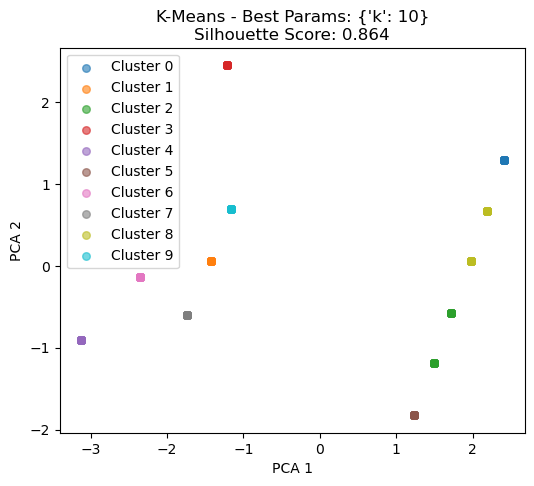

In [158]:
# --- K-MEANS ---
params = best_per_algo.loc[best_per_algo["Algorithm"] == "K-Means", "Parameters"].iloc[0]
score = best_per_algo.loc[best_per_algo["Algorithm"] == "K-Means", "Silhouette Score"].iloc[0]
model = KMeans(n_clusters=params["k"], random_state=42, n_init=10).fit(full_data)
labels = model.labels_
plt.figure(figsize=(6, 5))
for cluster in np.unique(labels):
    mask = labels == cluster
    plt.scatter(full_data[mask, 0], full_data[mask, 1], s=30, label=f"Cluster {cluster}", alpha=0.6)
plt.title(f"K-Means - Best Params: {params}\nSilhouette Score: {score:.3f}")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

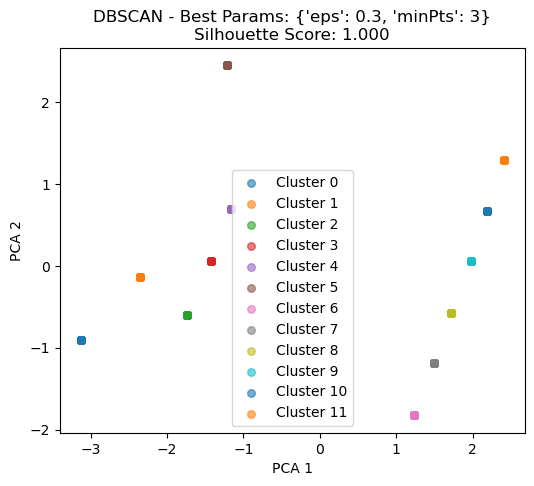

In [159]:
# --- DBSCAN ---
params = best_per_algo.loc[best_per_algo["Algorithm"] == "DBSCAN", "Parameters"].iloc[0]
score = best_per_algo.loc[best_per_algo["Algorithm"] == "DBSCAN", "Silhouette Score"].iloc[0]
model = DBSCAN(eps=params["eps"], min_samples=params["minPts"]).fit(full_data)
labels = model.labels_
plt.figure(figsize=(6, 5))
for cluster in np.unique(labels):
    mask = labels == cluster
    name = "Noise" if cluster == -1 else f"Cluster {cluster}"
    plt.scatter(full_data[mask, 0], full_data[mask, 1], s=30, label=name, alpha=0.6)
plt.title(f"DBSCAN - Best Params: {params}\nSilhouette Score: {score:.3f}")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

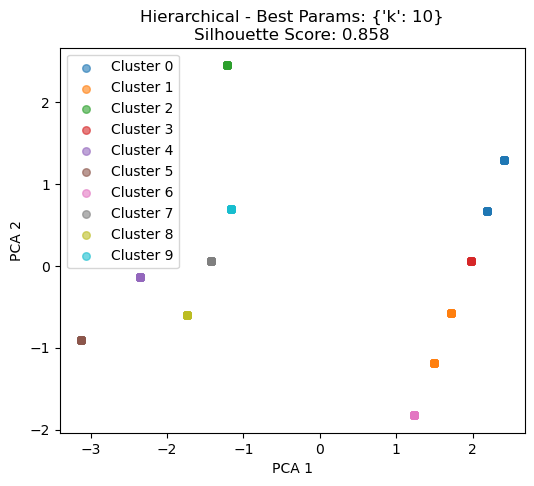

In [160]:
# --- HIERARCHICAL ---
params = best_per_algo.loc[best_per_algo["Algorithm"] == "Hierarchical", "Parameters"].iloc[0]
score = best_per_algo.loc[best_per_algo["Algorithm"] == "Hierarchical", "Silhouette Score"].iloc[0]
model = AgglomerativeClustering(n_clusters=params["k"], linkage='ward').fit(full_data)
labels = model.labels_
plt.figure(figsize=(6, 5))
for cluster in np.unique(labels):
    mask = labels == cluster
    plt.scatter(full_data[mask, 0], full_data[mask, 1], s=30, label=f"Cluster {cluster}", alpha=0.6)
plt.title(f"Hierarchical - Best Params: {params}\nSilhouette Score: {score:.3f}")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


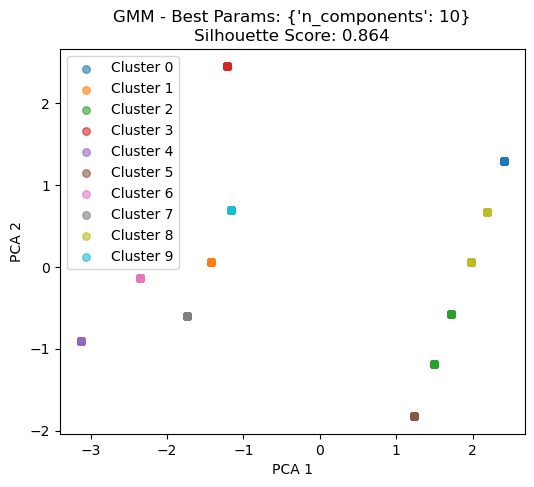

In [161]:
# --- GMM ---
params = best_per_algo.loc[best_per_algo["Algorithm"] == "GMM", "Parameters"].iloc[0]
score = best_per_algo.loc[best_per_algo["Algorithm"] == "GMM", "Silhouette Score"].iloc[0]
model = GaussianMixture(n_components=params["n_components"], random_state=42).fit(full_data)
labels = model.predict(full_data)
plt.figure(figsize=(6, 5))
for cluster in np.unique(labels):
    mask = labels == cluster
    plt.scatter(full_data[mask, 0], full_data[mask, 1], s=30, label=f"Cluster {cluster}", alpha=0.6)
plt.title(f"GMM - Best Params: {params}\nSilhouette Score: {score:.3f}")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

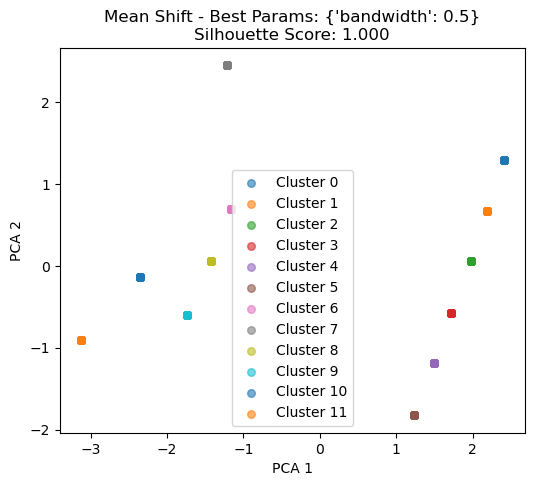

In [162]:
# --- MEAN SHIFT ---
params = best_per_algo.loc[best_per_algo["Algorithm"] == "Mean Shift", "Parameters"].iloc[0]
score = best_per_algo.loc[best_per_algo["Algorithm"] == "Mean Shift", "Silhouette Score"].iloc[0]
model = MeanShift(bandwidth=params["bandwidth"]).fit(full_data)
labels = model.labels_
plt.figure(figsize=(6, 5))
for cluster in np.unique(labels):
    mask = labels == cluster
    plt.scatter(full_data[mask, 0], full_data[mask, 1], s=30, label=f"Cluster {cluster}", alpha=0.6)
plt.title(f"Mean Shift - Best Params: {params}\nSilhouette Score: {score:.3f}")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

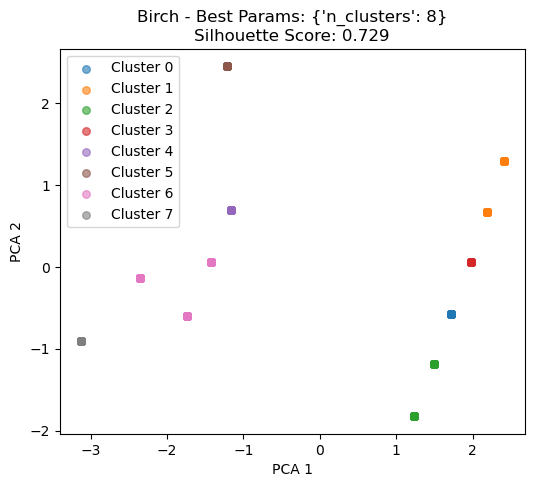

In [163]:
# --- BIRCH ---
params = best_per_algo.loc[best_per_algo["Algorithm"] == "Birch", "Parameters"].iloc[0]
score = best_per_algo.loc[best_per_algo["Algorithm"] == "Birch", "Silhouette Score"].iloc[0]
model = Birch(n_clusters=params["n_clusters"]).fit(full_data)
labels = model.labels_
plt.figure(figsize=(6, 5))
for cluster in np.unique(labels):
    mask = labels == cluster
    plt.scatter(full_data[mask, 0], full_data[mask, 1], s=30, label=f"Cluster {cluster}", alpha=0.6)
plt.title(f"Birch - Best Params: {params}\nSilhouette Score: {score:.3f}")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

C:\Users\yusuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


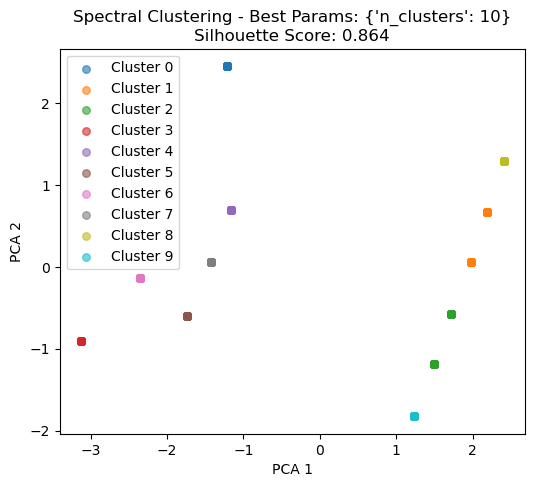

In [164]:
# --- SPECTRAL CLUSTERING ---
params = best_per_algo.loc[best_per_algo["Algorithm"] == "Spectral Clustering", "Parameters"].iloc[0]
score = best_per_algo.loc[best_per_algo["Algorithm"] == "Spectral Clustering", "Silhouette Score"].iloc[0]
model = SpectralClustering(n_clusters=params["n_clusters"], assign_labels="kmeans", random_state=42).fit(full_data)
labels = model.labels_
plt.figure(figsize=(6, 5))
for cluster in np.unique(labels):
    mask = labels == cluster
    plt.scatter(full_data[mask, 0], full_data[mask, 1], s=30, label=f"Cluster {cluster}", alpha=0.6)
plt.title(f"Spectral Clustering - Best Params: {params}\nSilhouette Score: {score:.3f}")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()